# Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [2]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 15.37 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os 
main_dir = '/content/datasets/Data'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [4]:
print(train_dir,train_covid_dir)

/content/datasets/Data/train /content/datasets/Data/train/COVID19


In [5]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(393).jpg', 'COVID19(188).jpg', 'COVID19(76).jpg', 'COVID19(221).jpg', 'COVID-19 (7).jpg', 'COVID19(251).jpg', 'COVID19(254).jpg', 'COVID19(94).jpg', 'COVID19(239).jpg', 'COVID19(252).jpg']
['NORMAL(487).jpg', 'NORMAL(313).jpg', 'NORMAL(97).jpg', 'NORMAL(1476).jpg', 'NORMAL(367).jpg', 'NORMAL(242).jpg', 'NORMAL(1307).jpg', 'NORMAL(746).jpg', 'NORMAL(1006).jpg', 'NORMAL(626).jpg']
['COVID19(160).jpg', 'COVID19(375).jpg', 'COVID-19 (875).jpg', 'COVID19(182).jpg', 'COVID19(261).jpg', 'COVID-19 (754).jpg', 'COVID-19 (773).jpg', 'COVID19(425).jpg', 'COVID19(383).jpg', 'COVID-19 (540).jpg']
['NORMAL(356).jpg', 'NORMAL(760).jpg', 'NORMAL(86).jpg', 'NORMAL(10).jpg', 'NORMAL(275).jpg', 'NORMAL(567).jpg', 'NORMAL(248).jpg', 'NORMAL(970).jpg', 'NORMAL(930).jpg', 'NORMAL(637).jpg']


In [6]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))


train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(393).jpg', '/content/datasets/Data/train/COVID19/COVID19(188).jpg', '/content/datasets/Data/train/COVID19/COVID19(76).jpg', '/content/datasets/Data/train/COVID19/COVID19(221).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (7).jpg', '/content/datasets/Data/train/COVID19/COVID19(251).jpg', '/content/datasets/Data/train/COVID19/COVID19(254).jpg', '/content/datasets/Data/train/COVID19/COVID19(94).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(487).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(313).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(97).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1476).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(367).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(242).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1307).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(746).jpg']


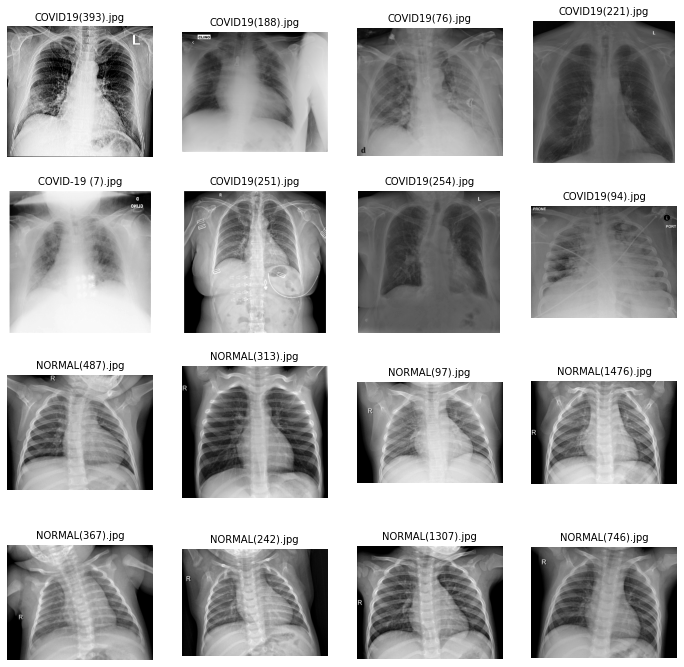

In [7]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

# Generating Training , Validation & Testing Batches

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

# Build CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train Model

In [12]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
#train the model
history = model.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
46/46 [==============================] - 78s 1s/step - loss: 0.8955 - accuracy: 0.7771 - val_loss: 0.4595 - val_accuracy: 0.8500
Epoch 2/20
46/46 [==============================] - 46s 1s/step - loss: 0.2147 - accuracy: 0.9220 - val_loss: 0.2950 - val_accuracy: 0.9312
Epoch 3/20
46/46 [==============================] - 45s 994ms/step - loss: 0.1689 - accuracy: 0.9365 - val_loss: 0.1600 - val_accuracy: 0.9625
Epoch 4/20
46/46 [==============================] - 46s 986ms/step - loss: 0.1344 - accuracy: 0.9496 - val_loss: 0.3127 - val_accuracy: 0.9250
Epoch 5/20
46/46 [==============================] - 45s 990ms/step - loss: 0.1307 - accuracy: 0.9551 - val_loss: 0.1286 - val_accuracy: 0.9719
Epoch 6/20
46/46 [==============================] - 46s 997ms/step - loss: 0.1246 - accuracy: 0.9614 - val_loss: 0.3470 - val_accuracy: 0.8188
Epoch 7/20
46/46 [==============================] - 46s 1s/step - loss: 0.1328 - accuracy: 0.9586 - val_loss: 0.1109 - val_accuracy: 0.9656
Epoch 8/

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

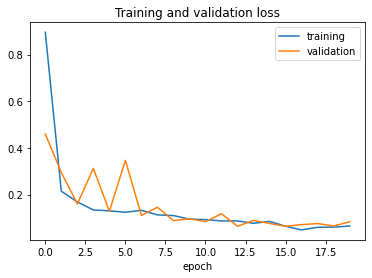

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

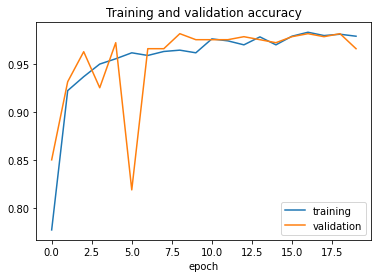

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np

# computing confusion matrix for the test set
y_true = test_generator.classes
probabilities = model.predict(test_generator)
y_pred = probabilities > 0.5

print(confusion_matrix(y_true, y_pred))
# test_loss , test_acc = model.evaluate(test_generator)
# print('test acc :{} test loss:{}'.format(test_acc,test_loss))

[[ 47 120]
 [ 91 226]]


In [21]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

In [22]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5') 